In [1]:
import pandas as pd
import numpy as np
import os
from  sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../data/merge_2330.csv",index_col=None)
data.set_index(data["Date"],inplace=True)
data.drop("Date",axis=1 , inplace=True)
data["Adj Close_log"] = data["Adj Close"].shift(1)
data["Adj Close_log"] = (data["Adj Close_log"] - data["Adj Close"])/data["Adj Close"]


dd = data[["Open","High","Low","Close","Adj Close","Volume","Adj Close_log"]]
data.drop(["Open","High","Low","Close","Adj Close","Volume","Adj Close_log"],axis=1, inplace=True)
data.dropna(inplace=True)

/root/.local/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/root/.local/lib/python3.6/site-packages/pandas/plotting/_core.py:393: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

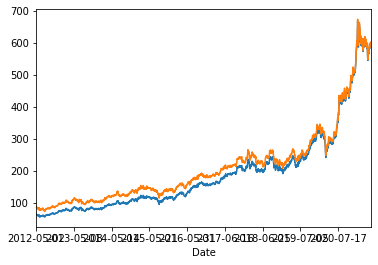

In [5]:
dd["Adj Close"].plot()
dd["Close"].plot()

In [3]:
model1 = IsolationForest(contamination="auto", max_samples="auto",
                        max_features=len(data.columns),n_estimators=100,
                        n_jobs=-1,bootstrap=False
                        )

In [4]:
pred  = model1.fit_predict(data)

In [5]:
data["score"] = model1.decision_function(data)
data["anomaly"] = pred
data["Adj Close"] = dd["Adj Close"]
data["Adj Close_log"] = dd["Adj Close_log"]

/root/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


TypeError: len() takes exactly one argument (0 given)

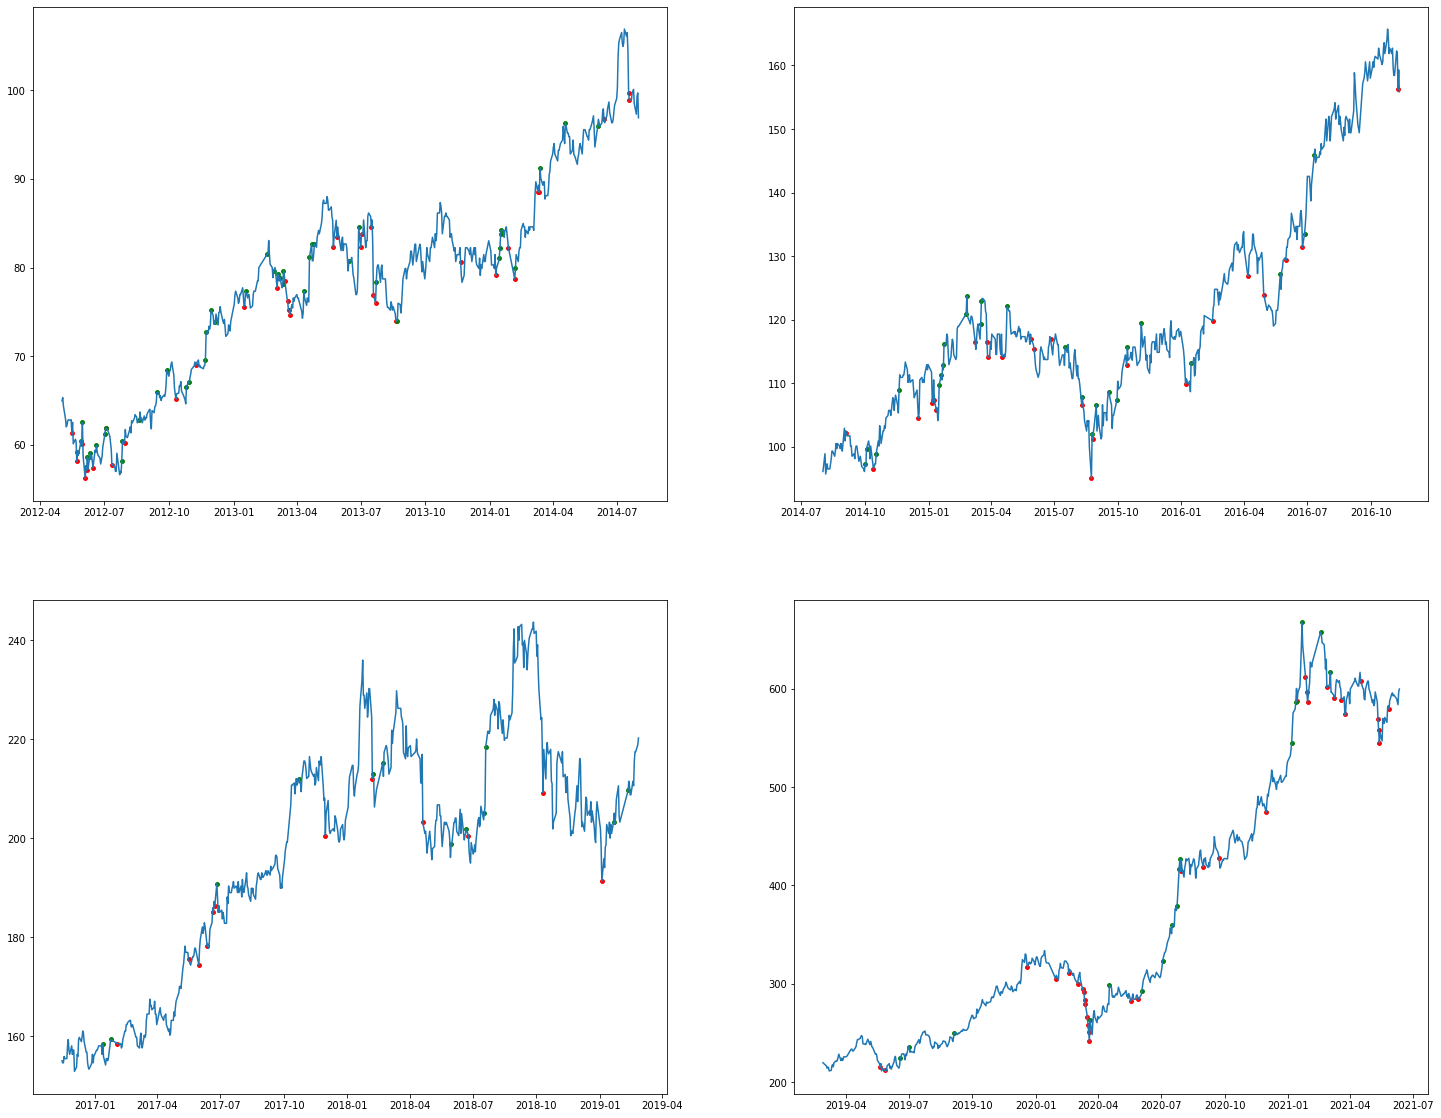

In [6]:
import  matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots(2,2)

split = 4 
split_date = np.array_split(data.index.values , split/2)

for index_rows , date in enumerate(split_date):
    split_dates = np.array_split(date, split/2)
    for index_columns ,dates in enumerate(split_dates):
        i = data.loc[dates]
        ax[index_rows,index_columns].plot(np.array(i.index.values , dtype = "datetime64[D]"), i["Adj Close"])
        ax[index_rows,index_columns].scatter(i[(i.anomaly == -1) & (i["Adj Close_log"] > 0 )].index, i[(i.anomaly == -1) & (i["Adj Close_log"] > 0 )]["Adj Close"], color="red", s=15, alpha=1)
        ax[index_rows,index_columns].scatter(i[(i.anomaly == -1) & (i["Adj Close_log"] < 0 )].index, i[(i.anomaly == -1) & (i["Adj Close_log"] < 0 )]["Adj Close"], color="green", s=15,alpha=1)

fig.set_figheight(20)
fig.set_figwidth(25)





/root/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/root/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/root/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the d

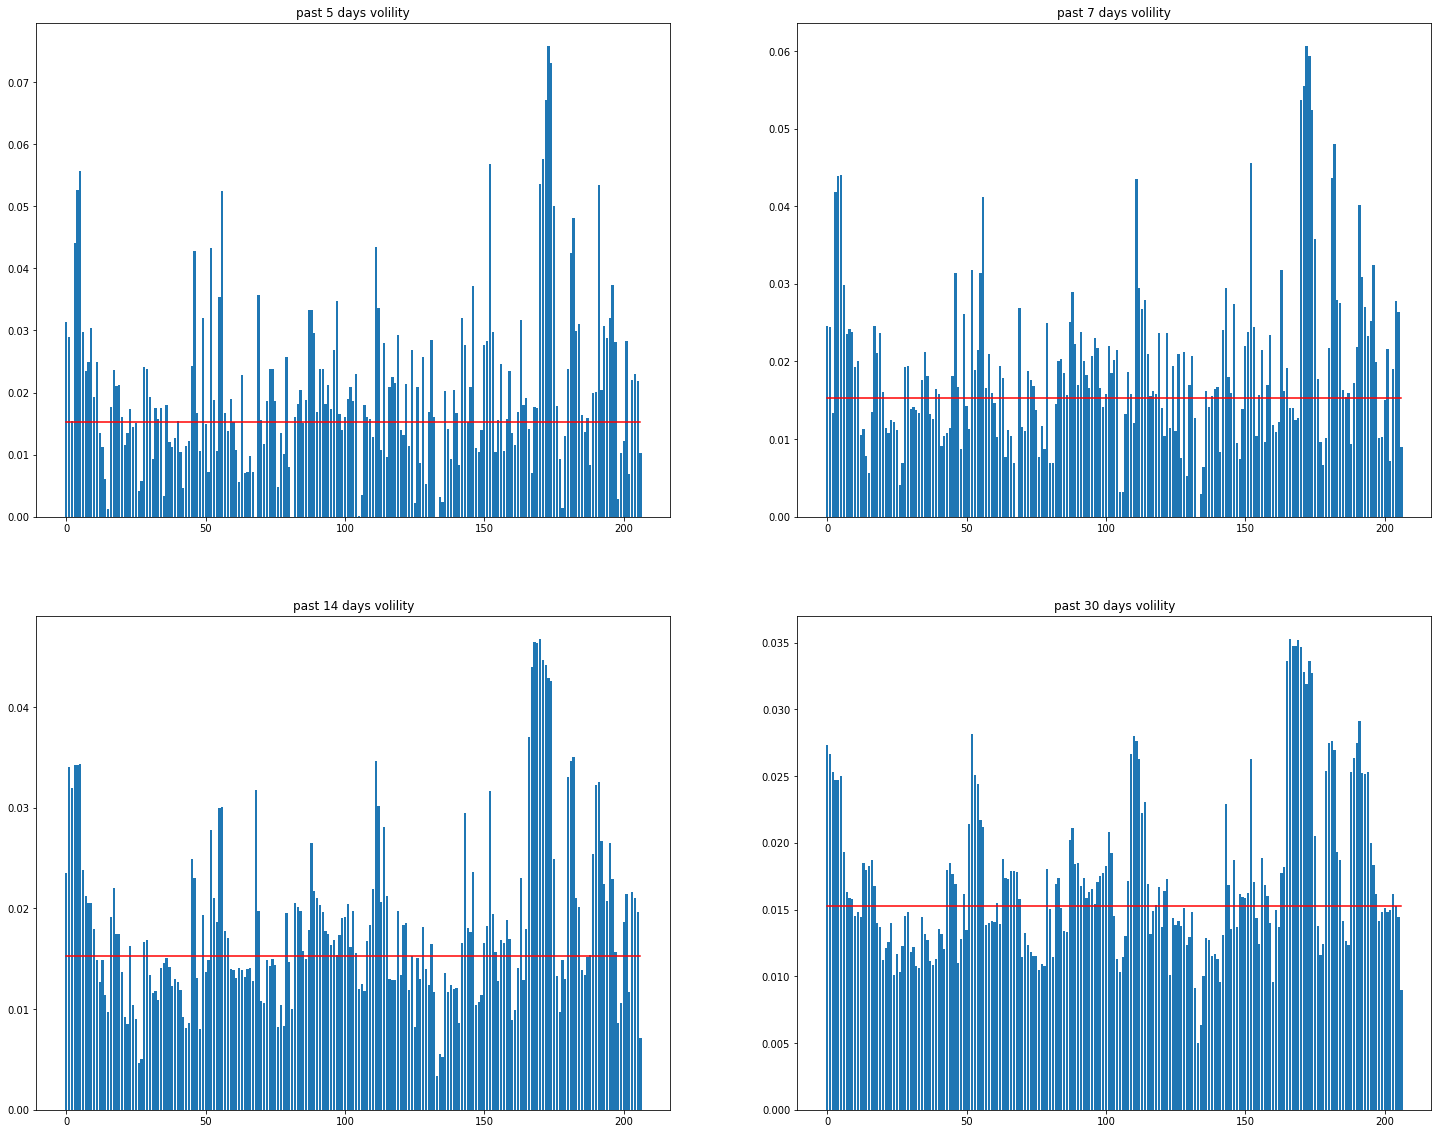

In [7]:
data["Adj Close_log"] = dd["Adj Close_log"]
anomaly_date = data.loc[data["anomaly"] == -1 ,["Adj Close_log"]]
anomaly_date = np.array(anomaly_date.index.values , dtype = "datetime64")

average_volility = data["Adj Close_log"].std()

def anomaly_volility_TimeStep(timestep):
    anomaly_volility = []
    for i in anomaly_date :
        date_range = np.arange(i,i+timestep)
        anomaly_volility.append(data.loc[ date_range.astype(str),"Adj Close_log" ].std())
    return anomaly_volility


fig , au = plt.subplots(2,2)
time_steps = [[5 ,7], [14 ,30]]

for rows , time_steps_ in enumerate(time_steps):
    for columns , time_step in enumerate(time_steps_):
        
        anomaly_volility = anomaly_volility_TimeStep(time_step)
        au[rows , columns].bar(np.arange(0,len(anomaly_volility)) ,anomaly_volility )
        au[rows , columns].plot(np.arange(0,len(anomaly_volility)) , [average_volility]*len(anomaly_volility) , color = "red" )
        au[rows , columns].set_title(f"past {time_step} days volility")
fig.set_figheight(20)
fig.set_figwidth(25)

In [8]:
import pandas as pd
import numpy as np
import os
from  sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [9]:
data["predict"] = data["Adj Close_log"].shift(-1) 
data["predict"] = data["predict"].apply(lambda x : 1 if x > 0 else 0)
# train_randomForest = data[data.anomaly == -1].drop("Adj Close_log",axis = 1)


In [10]:
train_y = train_randomForest[0:100].pop("predict")
train_x = train_randomForest[0:100]
test_y = train_randomForest[100:].pop("predict")
test_x = train_randomForest[100:]

NameError: name 'train_randomForest' is not defined

In [11]:
\
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [12]:

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation,
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(train_x, train_y)

In [13]:
# best = rf_random.best_estimator_
# predict = best.predict(test_x)

In [14]:
# from sklearn.metrics import classification_report
# report = classification_report(test_y,predict)
# print(report)

In [15]:
train_data2 = data.drop("Adj Close_log",axis = 1)

start_train_date = "2012-05-02"
end_train_date = "2019-01-01"
start_test_date = None
end_test_date = None

In [16]:
train = train_data2.loc[start_train_date:end_train_date]
test = train_data2.drop(train_data2.loc[start_train_date:end_train_date].index)
start_test_date = test.index.values.min()
end_test_date = test.index.values.max()

In [17]:
train_y_all = train.pop("predict")
train_x_all = train
test_y_all = test.pop("predict")
test_x_all = test

In [18]:

rf_all = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random_all = RandomizedSearchCV(estimator = rf_all, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random_all.fit(train_x_all, train_y_all)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [42]:
best_all = rf_random_all.best_estimator_
predict_all = best_all.predict(test_x_all)

In [43]:
from sklearn.metrics import classification_report
report_all = classification_report(test_y_all,predict_all)
print(report_all)

              precision    recall  f1-score   support

           0       0.59      0.74      0.65       337
           1       0.46      0.30      0.37       250

    accuracy                           0.55       587
   macro avg       0.52      0.52      0.51       587
weighted avg       0.53      0.55      0.53       587



In [41]:




report_all = classification_report(test_y_all,)
print(report_all)

              precision    recall  f1-score   support

           0       0.57      0.95      0.71       337
           1       0.33      0.03      0.06       250

    accuracy                           0.56       587
   macro avg       0.45      0.49      0.39       587
weighted avg       0.47      0.56      0.43       587



In [92]:
import talib
data[["Open","High","Low","Close","Adj Close","Volume","Adj Close_log"]] = dd[["Open","High","Low","Close","Adj Close","Volume","Adj Close_log"]]
upper, middle, lower = talib.BBANDS(data["Adj Close"], 
                                timeperiod=5,
                                # number of non-biased standard deviations from the mean
                                nbdevup=2,
                                nbdevdn=2,
                                # Moving average type: simple moving average here
                                matype=0)
data[["upper","middle","lower"]] = pd.concat([upper,middle,lower] , axis = 1)

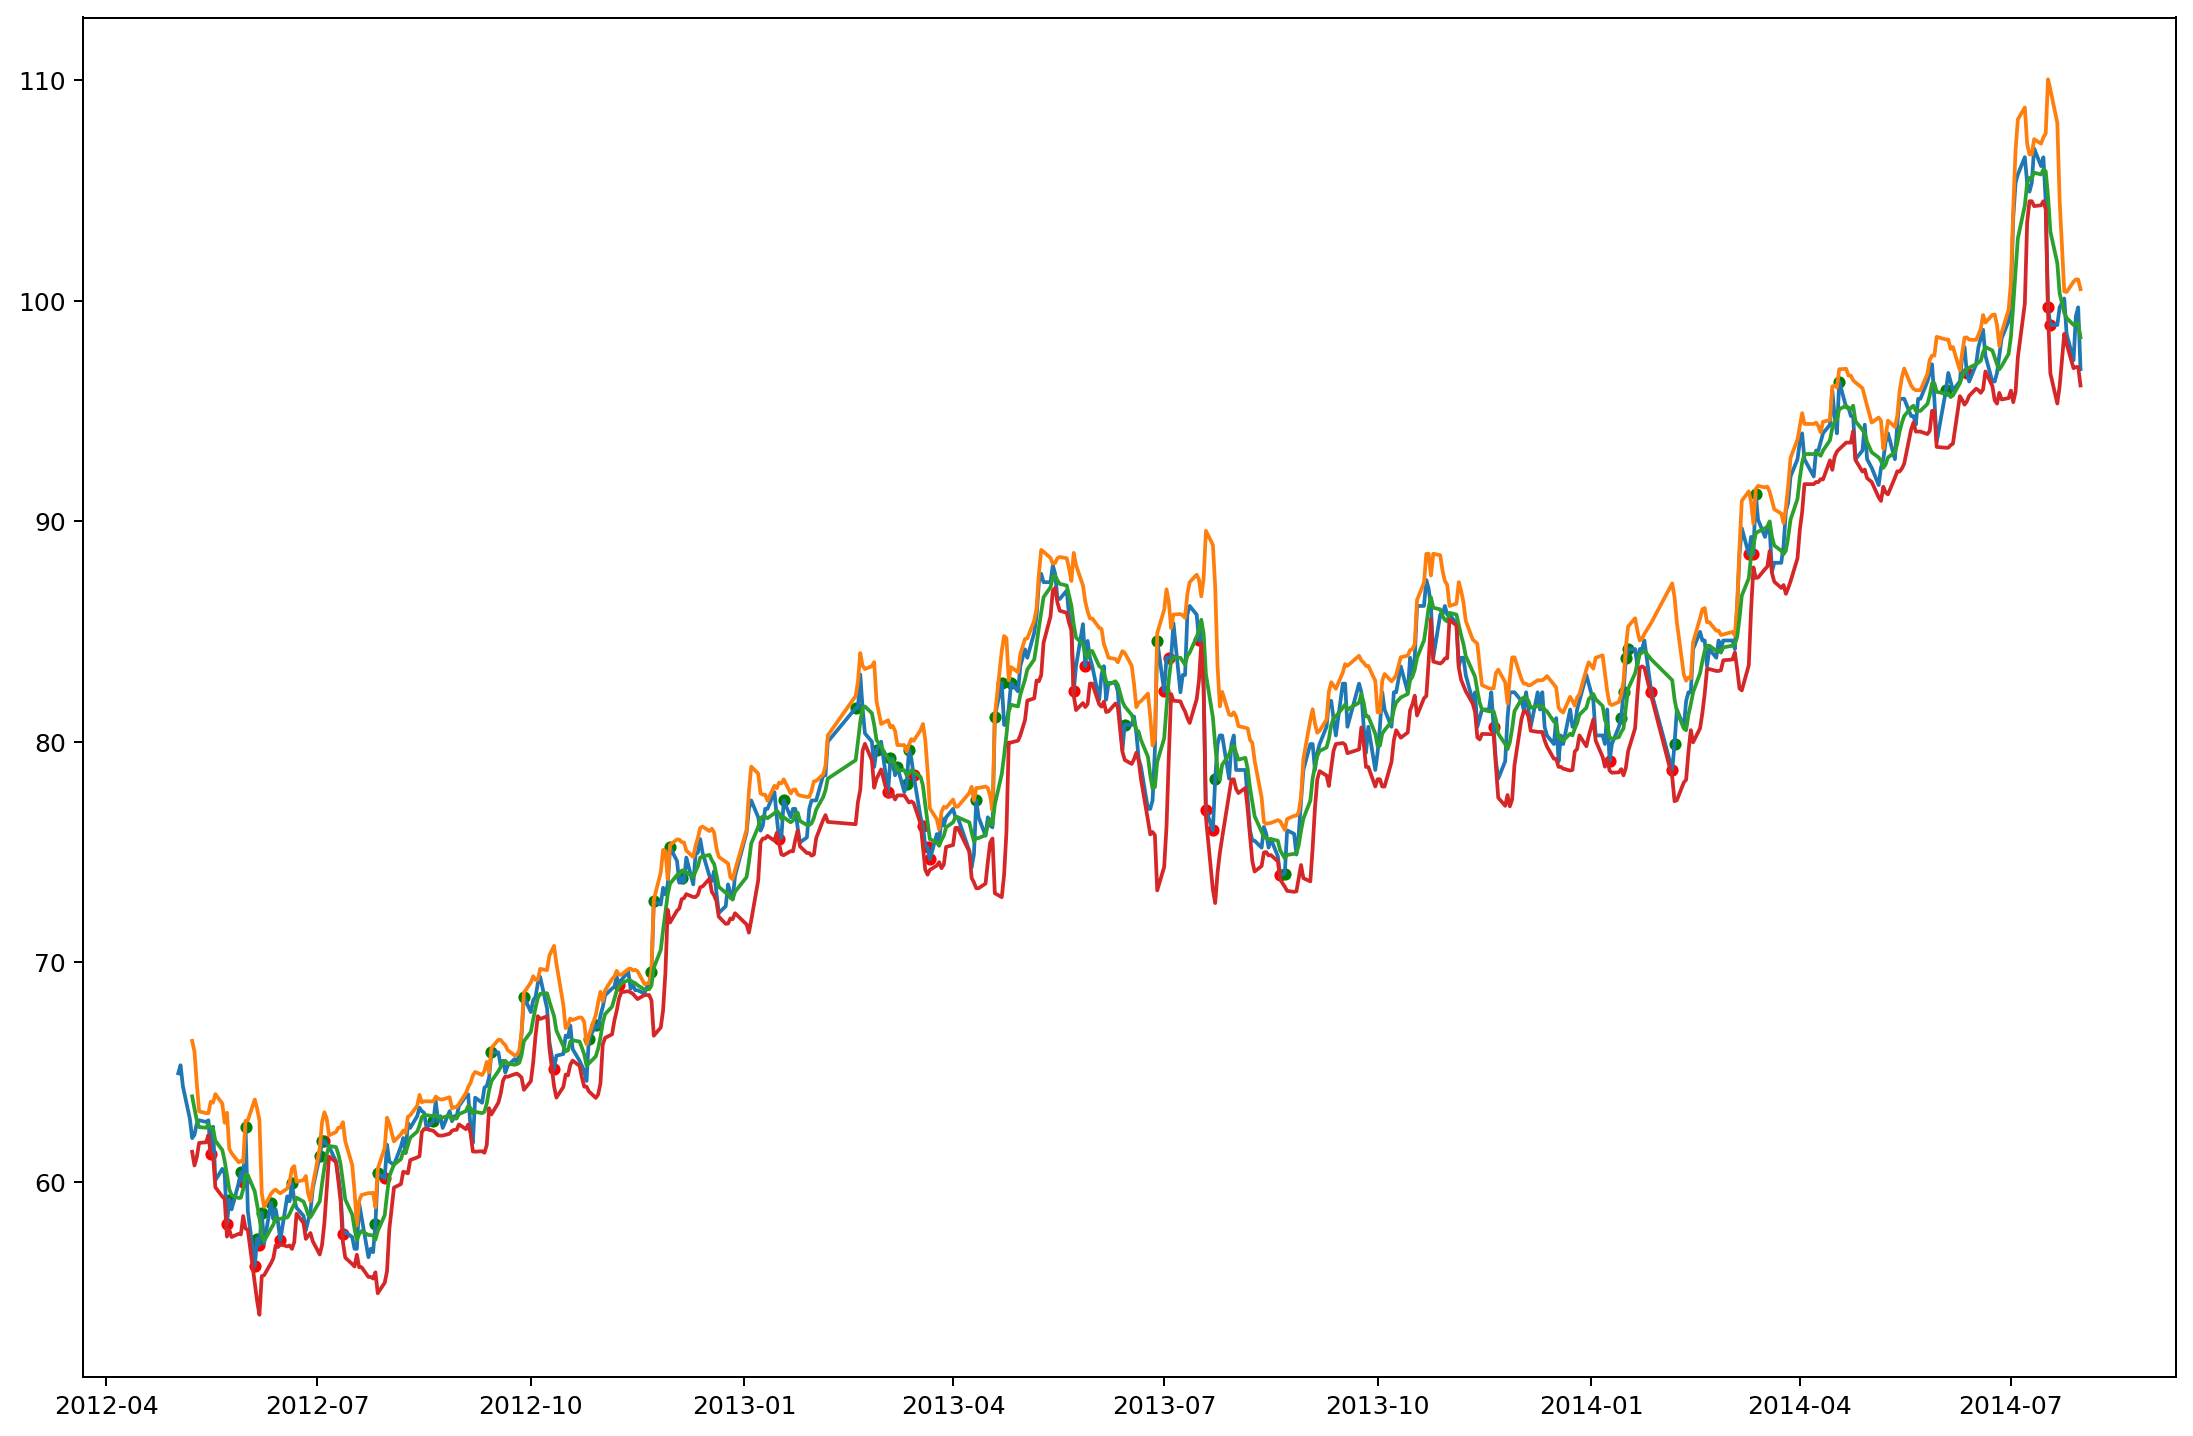

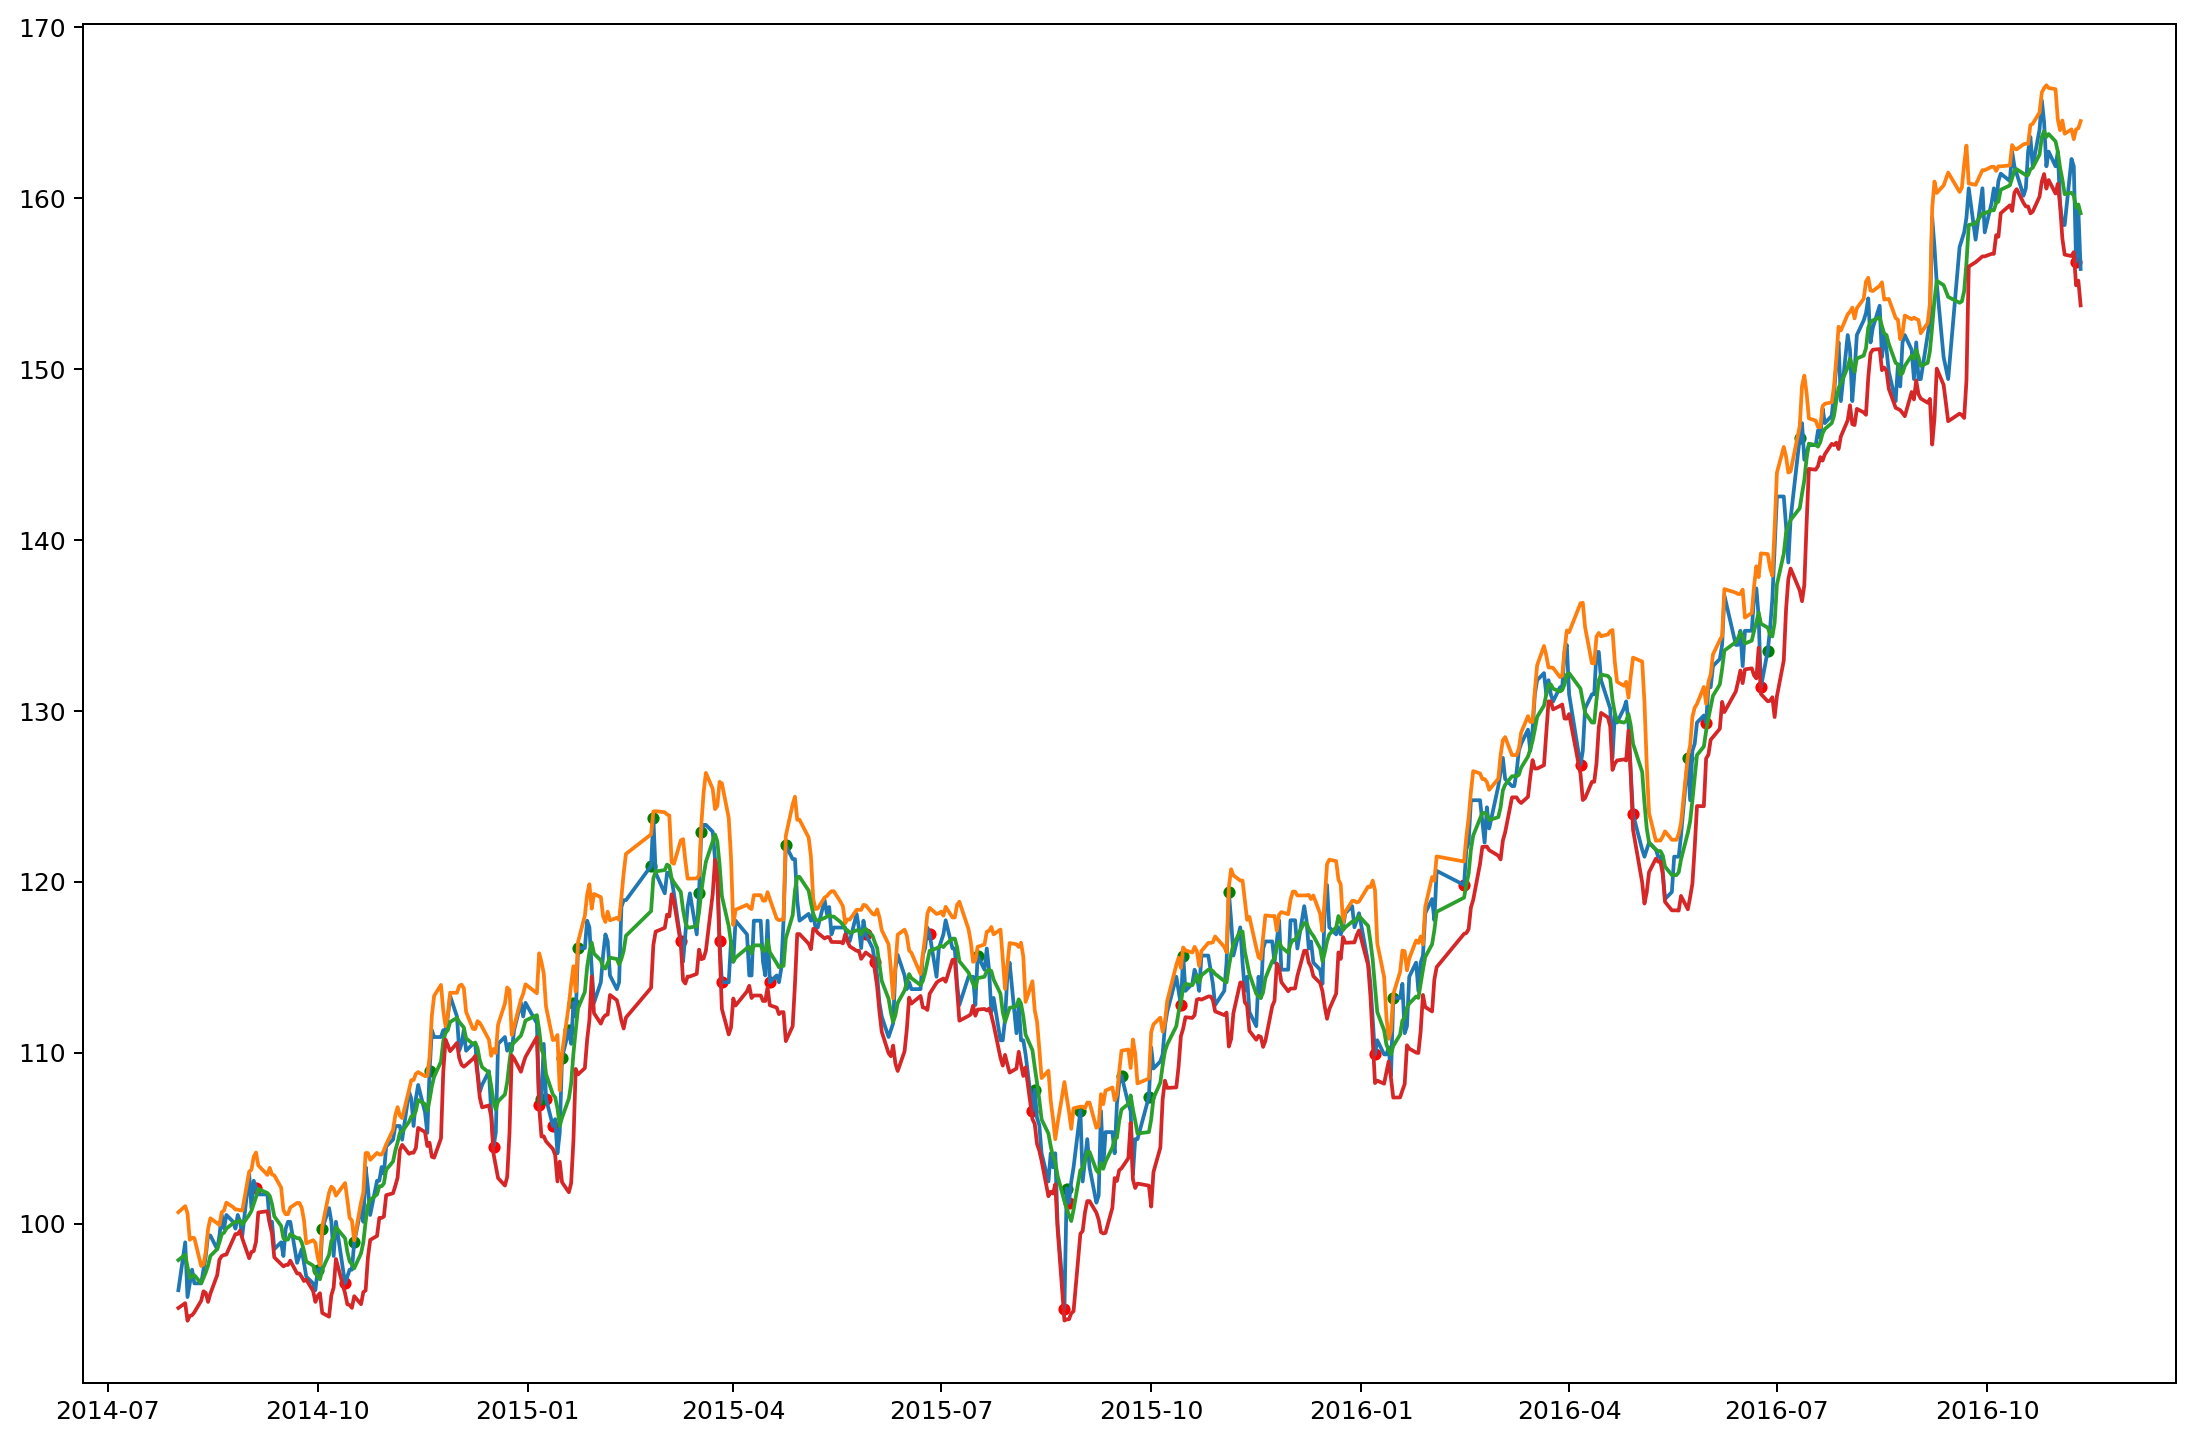

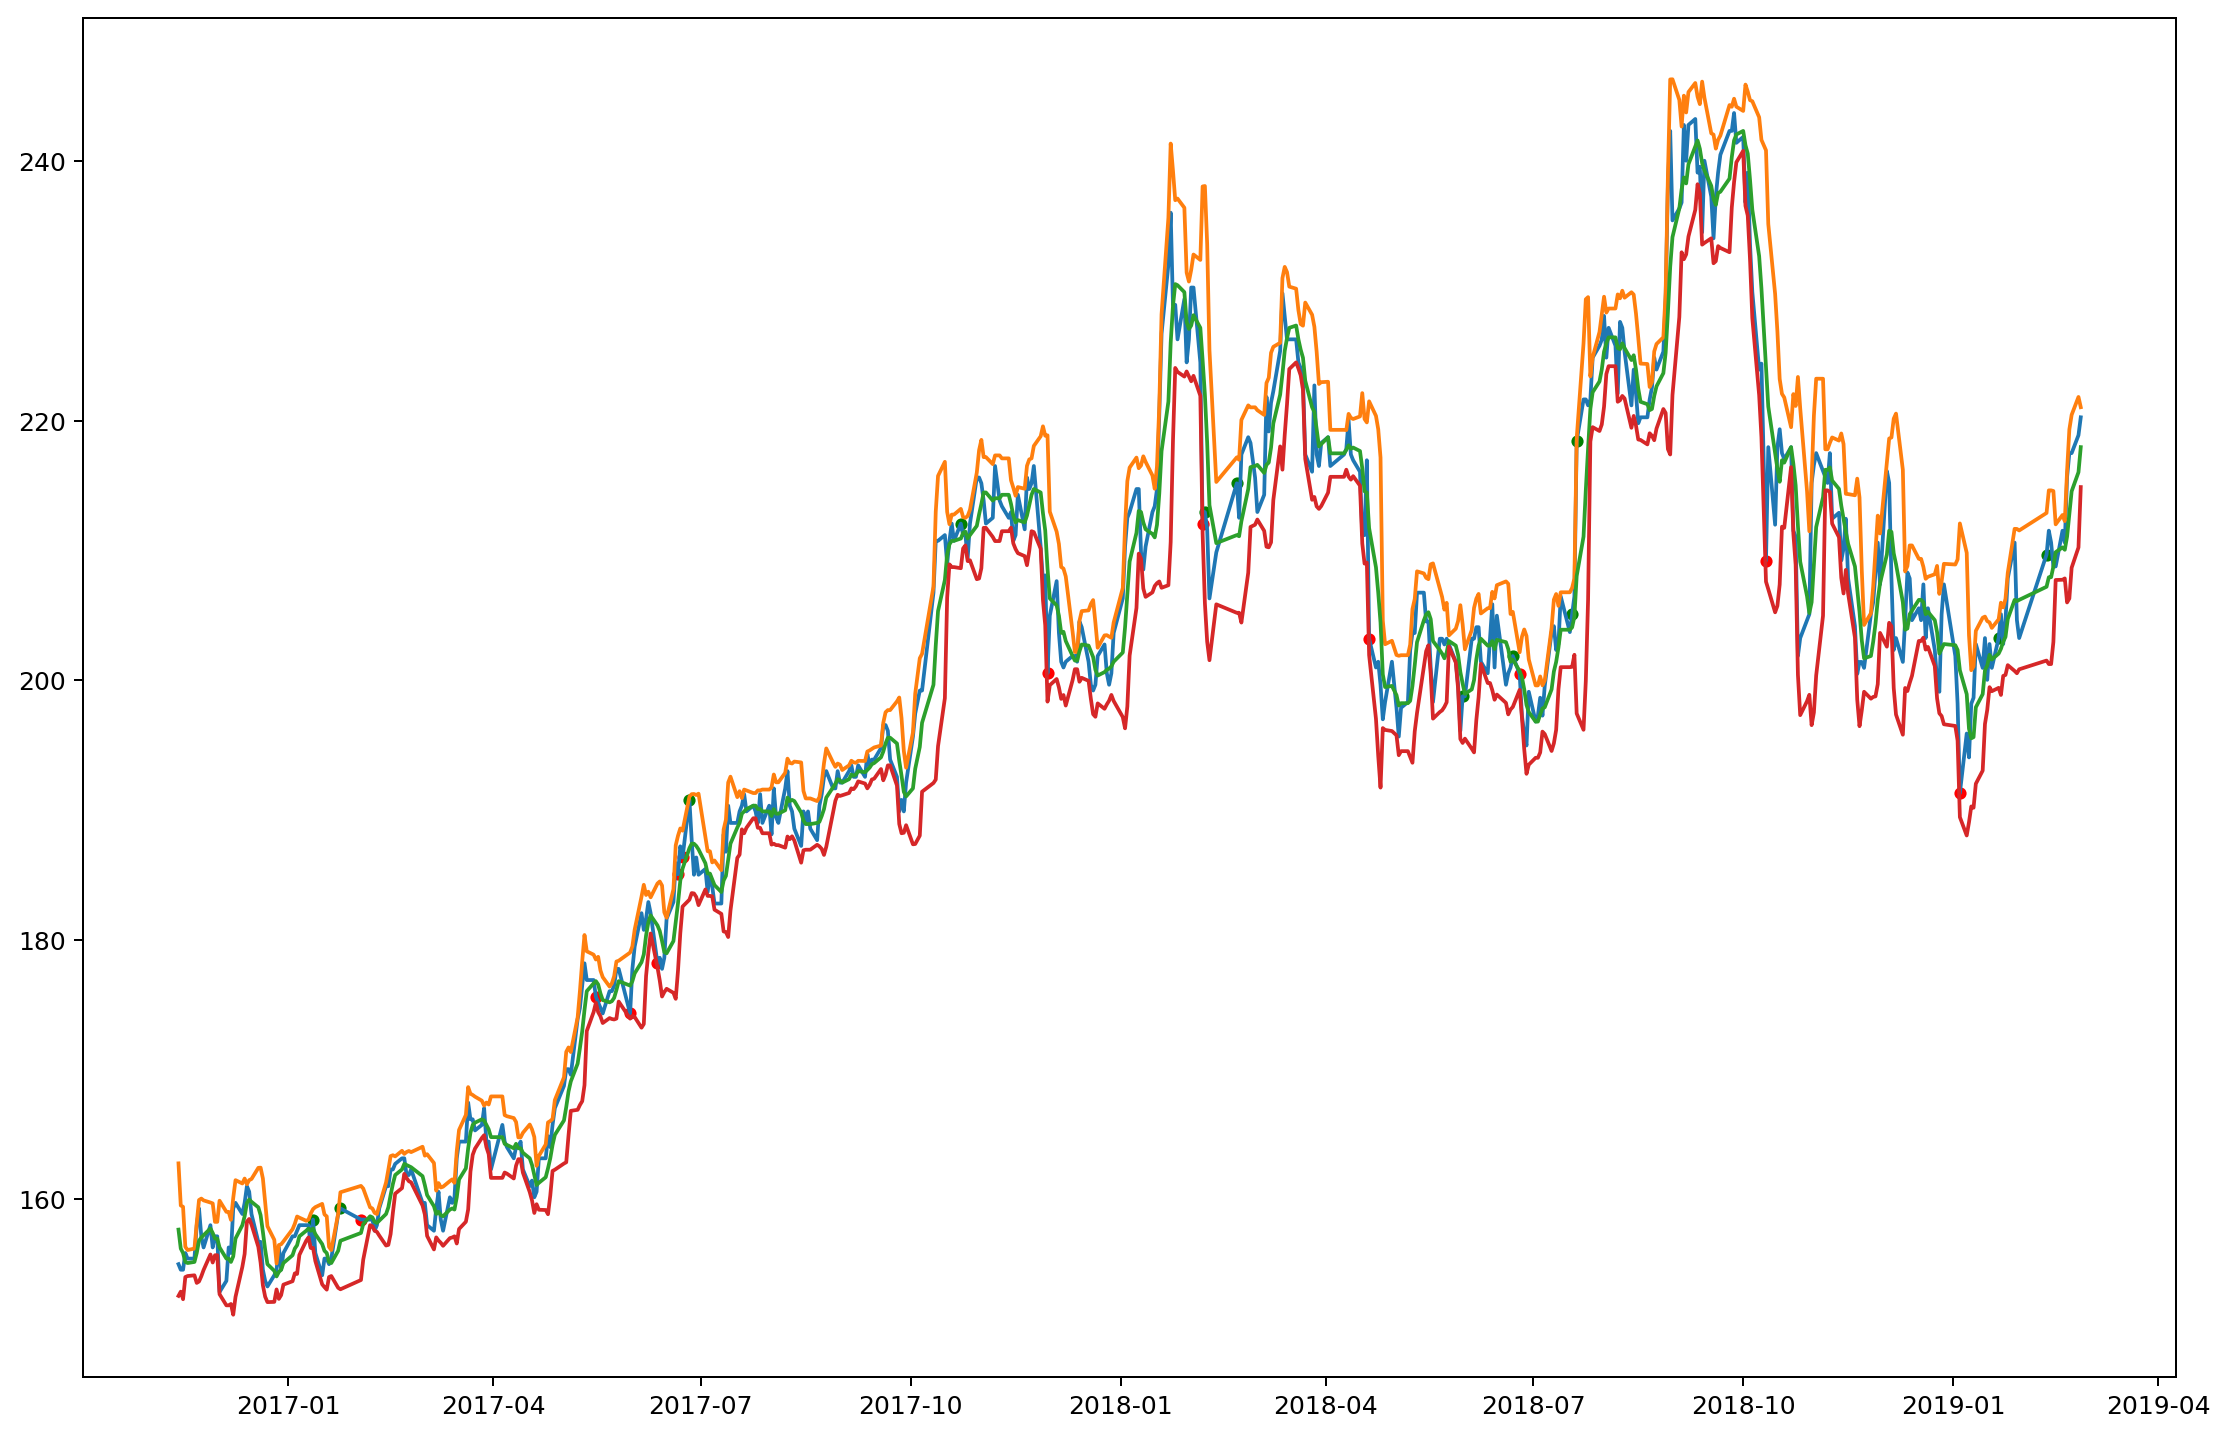

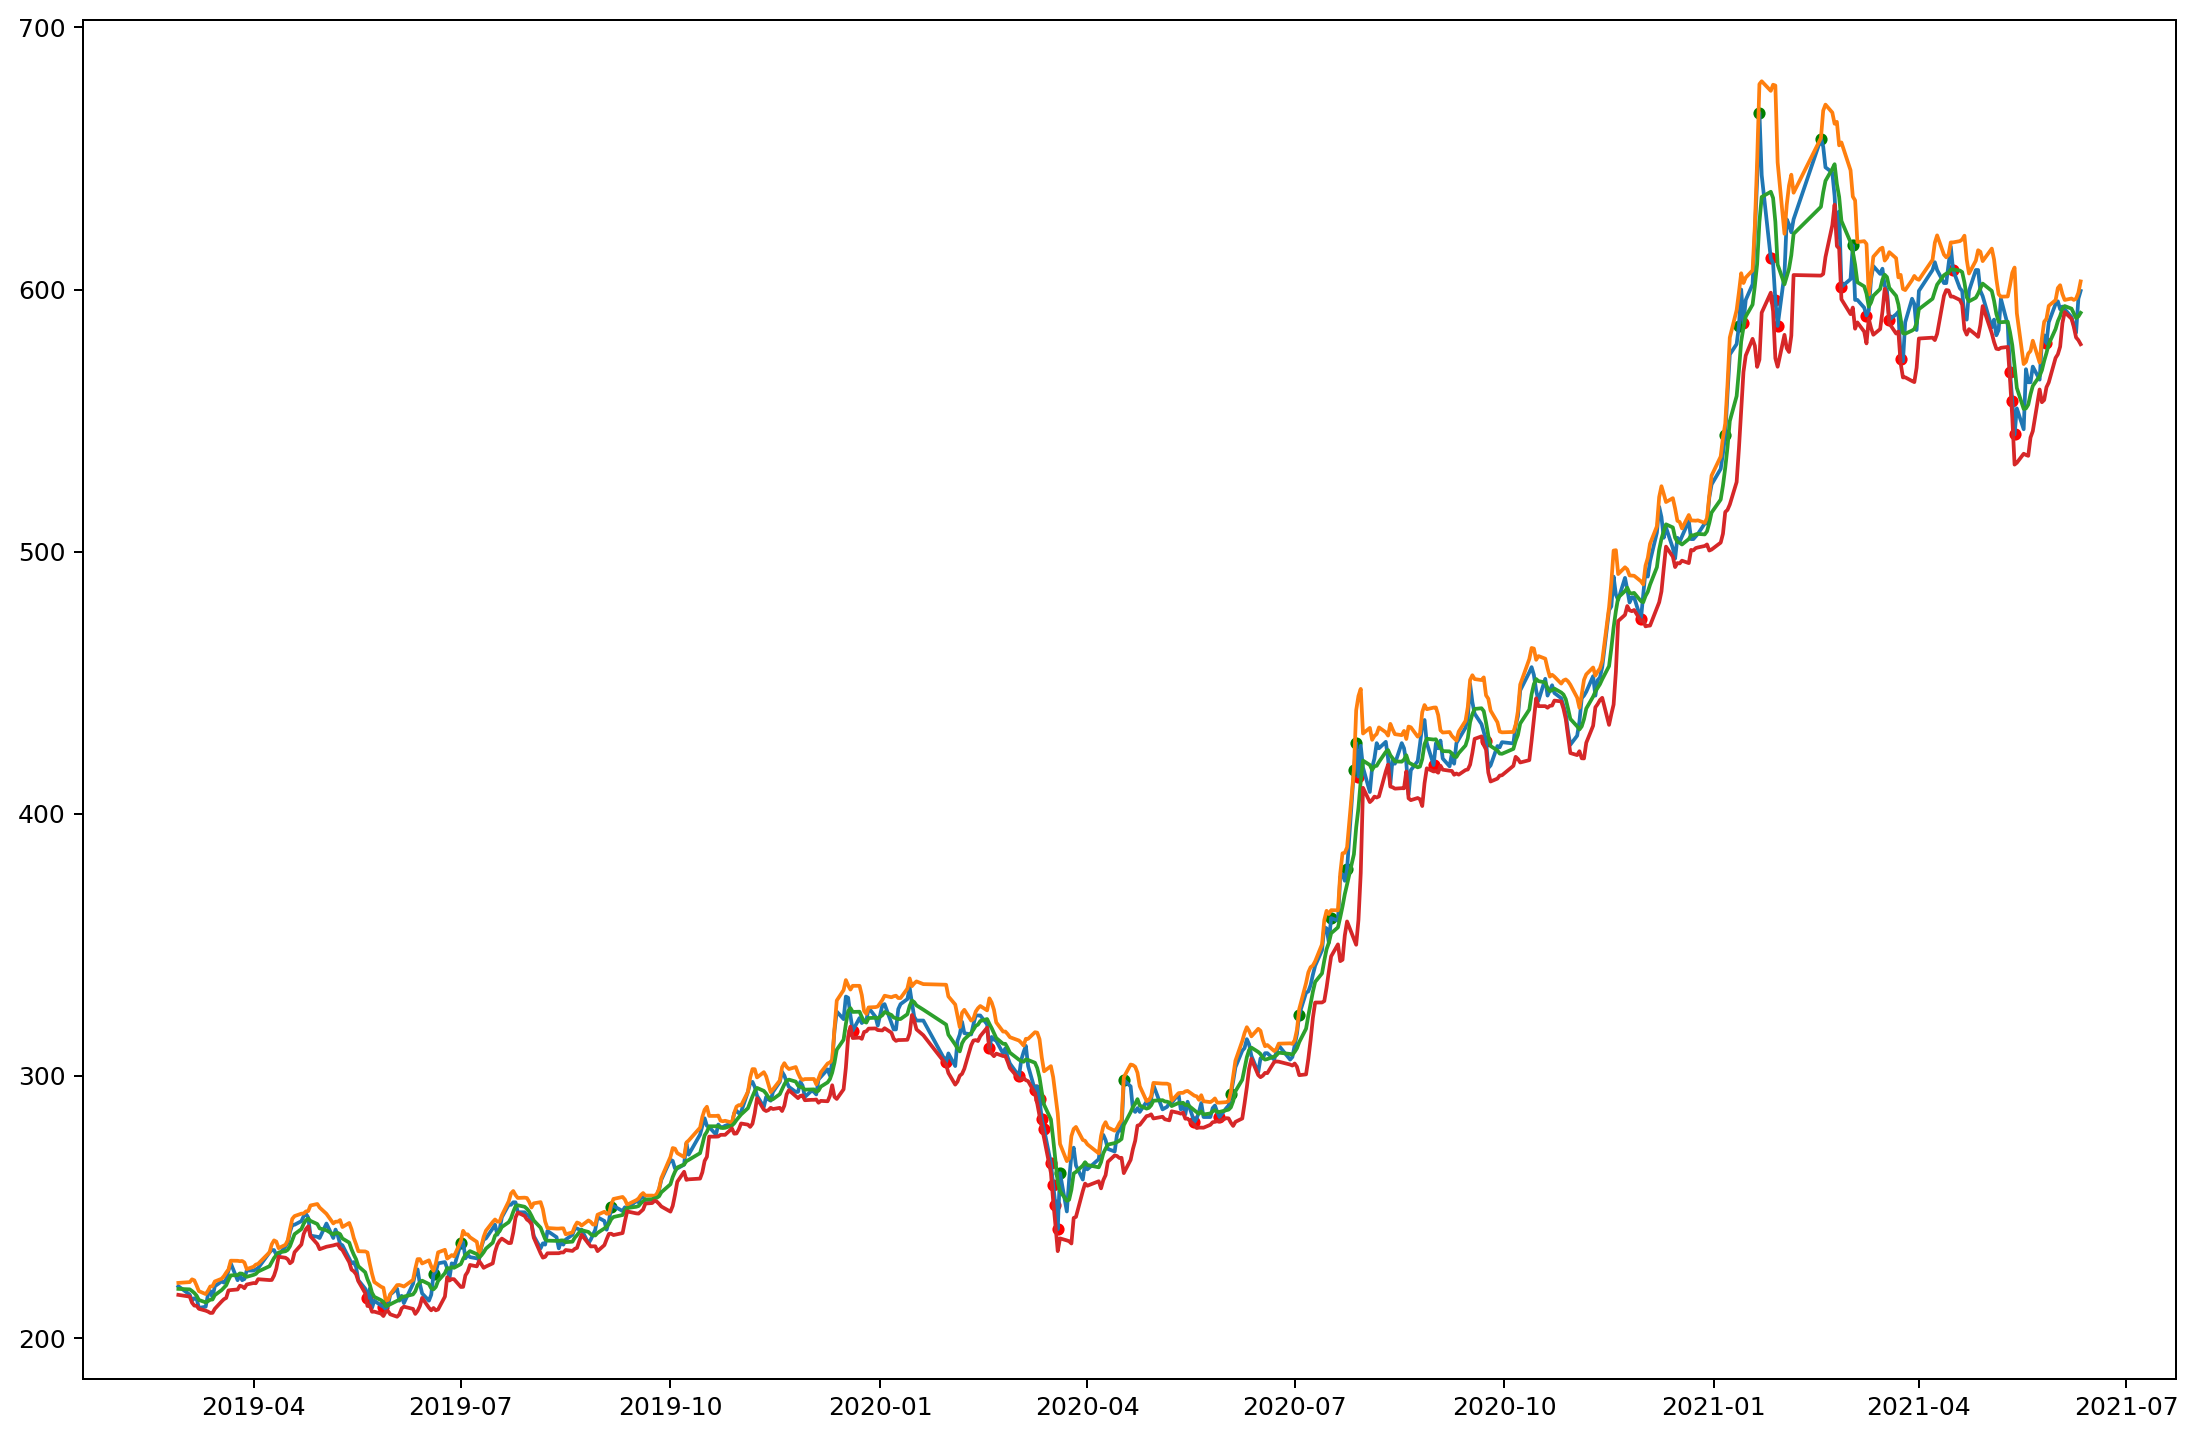

In [93]:


split = 4 
split_date = np.array_split(data.index.values , split/2)

for index_rows , date in enumerate(split_date):
    split_dates = np.array_split(date, split/2)
    for index_columns ,dates in enumerate(split_dates):
        plt.figure(figsize=(15, 10), dpi=180)
        i = data.loc[dates]
        plt.plot(np.array(i.index.values , dtype = "datetime64[D]"), i["Adj Close"])
        plt.scatter(i[(i.anomaly == -1) & (i["Adj Close_log"] > 0 )].index, i[(i.anomaly == -1) & (i["Adj Close_log"] > 0 )]["Adj Close"], color="red", s=15, alpha=1)
        plt.scatter(i[(i.anomaly == -1) & (i["Adj Close_log"] < 0 )].index, i[(i.anomaly == -1) & (i["Adj Close_log"] < 0 )]["Adj Close"], color="green", s=15,alpha=1)
        plt.plot(np.array(i.index.values , dtype = "datetime64[D]") , i["upper"])
        plt.plot(np.array(i.index.values , dtype = "datetime64[D]") , i["middle"])
        plt.plot(np.array(i.index.values , dtype = "datetime64[D]") , i["lower"])
        plt.show()
# fig.set_figheight(20)
# fig.set_figwidth(25)


In [2]:
import shioaji as sj

In [6]:
api = sj.Shioaji()
accounts = api.login("A125554742", "kobe910018")
api.activate_ca(
    ca_path="../../Sinopac.pfx",
    ca_passwd="A125554742",
    person_id="kobe655218",
)

Response Code: 0 | Event Code: 0 | Info: host '203.66.91.161:80', IP 203.66.91.161:80 (host 1 of 1) (host connection attempt 1 of 1) (total connection attempt 1 of 1) | Event: Session up


True

In [7]:
api.quote.subscribe(api.Contracts.Stocks["2330"], quote_type="tick")

Response Code: 200 | Event Code: 16 | Info: MKT/*/TSE/2330 | Event: Subscribe or Unsubscribe ok


In [23]:
from shioaji.data import Ticks
kbars = api.kbars(api.Contracts.Stocks["2330"], start="2014-06-01", end="2021-07-01")
df = pd.DataFrame({**kbars})
df.ts = pd.to_datetime(df.ts)
df

,Open,Close,High,Low,Volume,ts
0,222.5,222.5,223.0,222.5,3003,2018-12-07 09:01:00
1,222.5,222.5,222.5,222.5,187,2018-12-07 09:02:00
2,222.5,222.5,223.0,222.5,97,2018-12-07 09:03:00
3,222.5,222.5,223.0,222.5,197,2018-12-07 09:04:00
4,222.5,223.0,223.0,222.5,1657,2018-12-07 09:05:00
5,223.0,223.0,223.5,223.0,44,2018-12-07 09:06:00
6,223.5,223.0,223.5,223.0,44,2018-12-07 09:07:00
7,223.0,223.5,223.5,223.0,99,2018-12-07 09:08:00
8,223.0,223.0,223.0,223.0,28,2018-12-07 09:09:00
9,223.5,223.0,223.5,223.0,390,2018-12-07 09:10:00


In [24]:
import shioaji as sj

api = sj.Shioaji(simulation=True)
accounts = api.login("PAPIUSER01", "2222", contracts_timeout=10000)

contract = api.Contracts.Stocks.TSE.TSE2890
order = api.Order(
    price=14,
    quantity=1,
    action=sj.constant.Action.Sell,
    price_type=sj.constant.StockPriceType.LMT,
    order_type=sj.constant.TFTOrderType.ROD,
    first_sell=sj.constant.StockFirstSell.Yes,
    account=api.stock_account
)
trade = api.place_order(contract, order)
trade

Response Code: 0 | Event Code: 0 | Info: host '218.32.76.102:80', IP 218.32.76.102:80 (host 1 of 1) (host connection attempt 1 of 1) (total connection attempt 1 of 1) | Event: Session up


Trade(contract=Stock(exchange=<Exchange.TSE: 'TSE'>, code='2890', symbol='TSE2890', name='永豐金', category='17', unit=1000, limit_up=14.1, limit_down=11.6, reference=12.85, update_date='2021/06/25', day_trade=<DayTrade.Yes: 'Yes'>), order=Order(action=<Action.Sell: 'Sell'>, price=14, quantity=1, id='1ae9d0b4', seqno='064803', ordno='00000', account=Account(account_type=<AccountType.Stock: 'S'>, person_id='PAPIUSER01', broker_id='9A95', account_id='0504350', signed=True), price_type=<StockPriceType.LMT: 'LMT'>, order_type=<FuturesOrderType.ROD: 'ROD'>, first_sell=<StockFirstSell.Yes: 'true'>), status=OrderStatus(id='1ae9d0b4', status=<Status.PendingSubmit: 'PendingSubmit'>, status_code='0', order_datetime=datetime.datetime(2021, 6, 27, 17, 4, 50), deals=[]))